1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

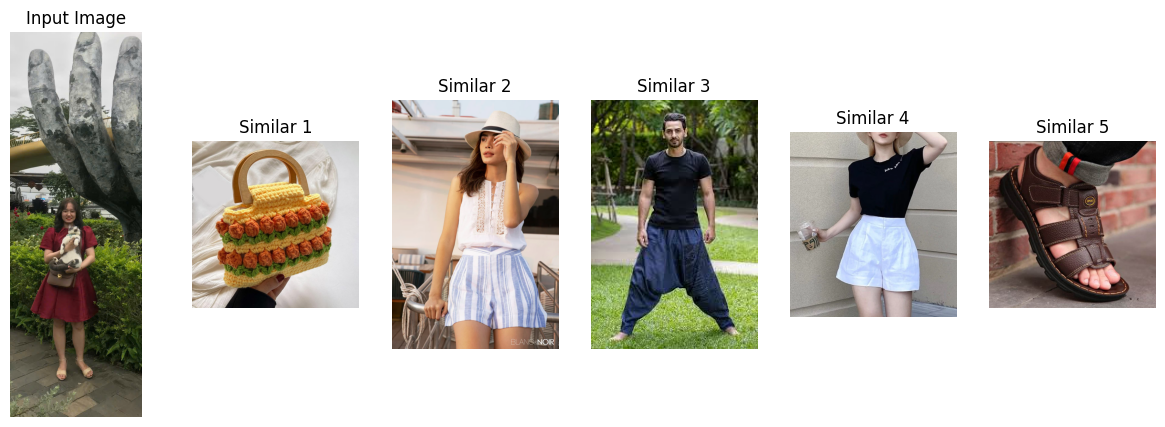

In [3]:
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Hàm tiền xử lý hình ảnh
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Không thể đọc được hình ảnh từ đường dẫn: {image_path}")
    img = cv2.resize(img, (224, 224))  # Resizing về kích thước chuẩn của mô hình (224x224)
    img = img / 255.0  # Chuẩn hóa về khoảng [0, 1]
    return img

# Tạo mô hình ResNet50 để trích xuất đặc trưng
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Đường dẫn tới folder chứa các class hình ảnh
data_path = r'D:\API_FASHION\ImagesData'

# Danh sách các class (tên các folder)
classes = ['Bag', 'Head_wear', 'Pants', 'Shirt', 'Shoes', 'Short']

# Tạo danh sách để lưu trữ đường dẫn và đặc trưng của hình ảnh
image_features = []
image_paths = []

# Trích xuất đặc trưng cho từng hình ảnh trong từng class
for class_name in classes:
    class_folder = os.path.join(data_path, class_name)  # Đường dẫn đến từng folder class
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        if image_name.endswith(('.jpg', '.jpeg', '.png')):
            img = preprocess_image(image_path)
            features = model.predict(np.expand_dims(img, axis=0))
            image_features.append(features)
            image_paths.append(image_path)

# Chuyển danh sách đặc trưng thành numpy array
image_features = np.array(image_features).squeeze()

# Hàm tìm kiếm hình ảnh tương tự
def retrieve_similar_images(input_image_path, top_n=5):
    input_img = preprocess_image(input_image_path)
    input_features = model.predict(np.expand_dims(input_img, axis=0)).squeeze()

    # Tính toán độ tương đồng cosine với tất cả các đặc trưng hình ảnh
    similarities = cosine_similarity([input_features], image_features)

    # Lấy top_n ảnh tương tự nhất
    top_indices = np.argsort(similarities[0])[-top_n:][::-1]

    # Hiển thị hình ảnh đầu vào
    plt.figure(figsize=(15, 5))

    # Hiển thị hình ảnh đầu vào
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.axis('off')

    # Hiển thị các ảnh tương tự
    for idx, index in enumerate(top_indices):
        plt.subplot(1, top_n + 1, idx + 2)
        img = cv2.imread(image_paths[index])
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Similar {idx + 1}')
        plt.axis('off')

    plt.show()

# Gọi hàm với hình ảnh đầu vào
input_image_path = r'C:\Users\camnh\Downloads\anh_test_fashion.jpg'
retrieve_similar_images(input_image_path)


In [ ]:
pip install pandas scikit-learn

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Hàm tiền xử lý hình ảnh
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Không thể đọc được hình ảnh từ đường dẫn: {image_path}")
    img = cv2.resize(img, (224, 224))  # Resizing về kích thước chuẩn của mô hình (224x224)
    img = img / 255.0  # Chuẩn hóa về khoảng [0, 1]
    return img

# Tạo mô hình ResNet50 để trích xuất đặc trưng
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Đường dẫn tới folder chứa các class hình ảnh
data_path = r'D:\API_FASHION\ImagesData'

# Danh sách các class (tên các folder)
classes = ['Bag', 'Head_wear', 'Pants', 'Shirt', 'Shoes', 'Short']

# Tạo danh sách để lưu trữ đường dẫn và đặc trưng của hình ảnh
image_features = []
image_paths = []

# Trích xuất đặc trưng cho từng hình ảnh trong từng class
for class_name in classes:
    class_folder = os.path.join(data_path, class_name)  # Đường dẫn đến từng folder class
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        if image_name.endswith(('.jpg', '.jpeg', '.png')):
            img = preprocess_image(image_path)
            features = model.predict(np.expand_dims(img, axis=0))
            image_features.append(features)
            image_paths.append(image_path)
image_features[0]

In [2]:
image_features

array([[0.        , 0.        , 0.05997699, ..., 2.621753  , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02308947, ..., 2.8207705 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0314955 , ..., 2.7092228 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.0314951 , ..., 1.6780818 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.9173031 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.8148603 , 0.        ,
        0.        ]], dtype=float32)